<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_2/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ZipDigits.info')
df.head()

,Normalized handwritten digits,automatically
0,scanned from envelopes by the U.S. Postal Serv...,NaN
1,scanned digits are binary and of different siz...,NaN
2,images here have been deslanted and size norm...,resulting
3,in 16 x 16 grayscale images (Le Cun et al.,1990).
4,The data are in two gzipped files,and each line consists of the digit


In [7]:
# Load the training and testing datasets
train_data = pd.read_csv('ZipDigits.train', header=None, sep=' ')
test_data = pd.read_csv('ZipDigits.test', header=None, sep=' ')

In [8]:
# Filter the training and testing datasets
n1 = 1
n2 = 5
train_data_filtered = train_data[(train_data[0] == n1) | (train_data[0] == n2)]
test_data_filtered = test_data[(test_data[0] == n1) | (test_data[0] == n2)]

# Drop the column containing NaN values
train_data_filtered = train_data_filtered.dropna(axis=1)
test_data_filtered = test_data_filtered.dropna(axis=1)

In [9]:
# Convert labels to binary classification
train_data_filtered[0] = train_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)
test_data_filtered[0] = test_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)

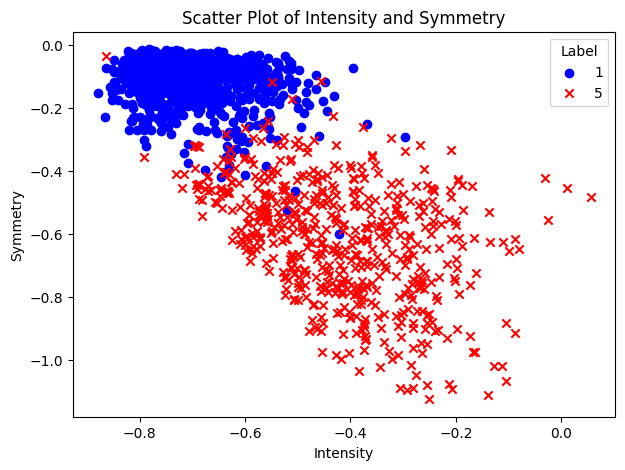

In [59]:
intensity_list_train = []
symmetry_list_train = []
labels_train = []

for index, row in train_data_filtered.iterrows():
    label = row[0]
    pixels = row[1:].values

    # Find the intensity
    intensity = np.mean(pixels)

    # Find the symmetry
    left_half = pixels[:128]
    right_half = np.flip(pixels[128:])
    symmetry = -np.mean(np.abs(left_half - right_half))

    intensity_list_train.append(intensity)
    symmetry_list_train.append(symmetry)
    labels_train.append(label)

plt.figure(figsize=(7, 5))

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels[i] == 1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels[i] == 1],
            label='1', color='blue', marker='o')

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels[i] == -1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels[i] == -1],
            label='5', color='red', marker='x')

plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('Scatter Plot of Intensity and Symmetry')
plt.legend(title='Label')
plt.show()

In [11]:
# Function to extract features
def extract_features(intensity_list, symmetry_list, data):
    x = np.column_stack((np.ones(len(intensity_list)), intensity_list, symmetry_list))
    y = data[0].values
    return x, y

In [12]:
x_train, y_train = extract_features(intensity_list_train, symmetry_list_train, train_data_filtered)

In [16]:
# PLA algorithm
def pla(x, y, max_iterations=1000):
    w = np.zeros(x.shape[1])
    for _ in range(max_iterations):
        # Predict using current weights
        predictions = np.sign(np.dot(x, w))

        # Find misclassified points
        misclassified = np.where(predictions != y)[0]
        if len(misclassified) == 0:
            break

        # Randomly choose a misclassified point and update weights
        random_point = np.random.choice(misclassified)
        w += y[random_point] * x[random_point]

    return w

# Run PLA
w_PLA = pla(x_train, y_train)
w_PLA

array([ 0.        , -4.00698047,  9.33791406])

In [14]:
# Pocket Algorithm
def pocket_algorithm(x, y, w, max_iterations=1000):
    # w = np.zeros(x.shape[1])
    w_pocket = np.copy(w)

    pocket_errors = np.inf

    for _ in range(max_iterations):
        # Predict using current weights
        predictions = np.sign(np.dot(x, w))

        # Find misclassified points
        misclassified = np.where(predictions != y)[0]
        current_errors = len(misclassified)

        # Update pocket if current solution is better
        if current_errors < pocket_errors:
            w_pocket = np.copy(w)
            pocket_errors = current_errors

        if pocket_errors == 0:
            break

        # Randomly choose a misclassified point and update weights
        random_point = np.random.choice(misclassified)
        w += y[random_point] * x[random_point]

    return w_pocket

# Run Pocket Algorithm
w_pocket = pocket_algorithm(x_train, y_train, w_PLA)
w_pocket

array([ 1.        , -2.98663281,  8.23545313])

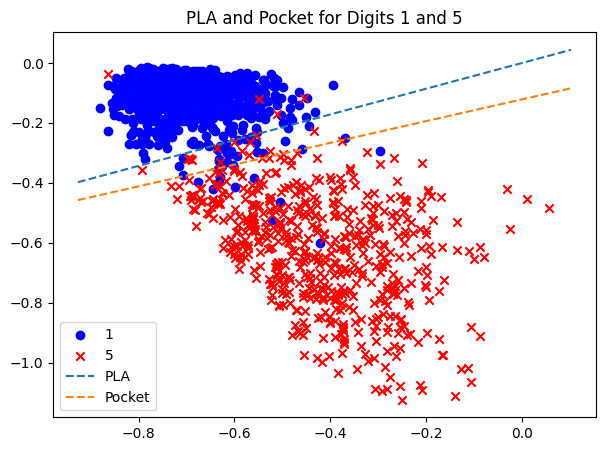

In [74]:
plt.figure(figsize=(7, 5))
plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            label='1', color='blue', marker='o')

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            label='5', color='red', marker='x')

axes = plt.gca()
x_val = np.array(axes.get_xlim())
# x_val = np.linspace(min(intensity_list), max(intensity_list), 100)
# y_val = -(w_PLA[0] + w_PLA[1] * x_val) / w_PLA[2]
y_val_pla = -w_PLA[0]/w_PLA[2] - w_PLA[1]/w_PLA[2] * x_val
y_val_pocket = -w_pocket[0]/w_pocket[2] - w_pocket[1]/w_pocket[2] * x_val
plt.plot(x_val, y_val_pla, '--', label='PLA')
plt.plot(x_val, y_val_pocket, '--', label='Pocket')
plt.legend()
plt.title('PLA and Pocket for Digits 1 and 5')
plt.show()

In [61]:
intensity_list_test = []
symmetry_list_test = []
labels_test = []

for index, row in test_data_filtered.iterrows():
    label = row[0]
    pixels = row[1:].values

    # Find the intensity
    intensity = np.mean(pixels)

    # Find the symmetry
    left_half = pixels[:128]
    right_half = np.flip(pixels[128:])
    symmetry = -np.mean(np.abs(left_half - right_half))

    intensity_list_test.append(intensity)
    symmetry_list_test.append(symmetry)
    labels_test.append(label)

In [62]:
x_test, y_test = extract_features(intensity_list_test, symmetry_list_test, test_data_filtered)

In [63]:
def compute_error_rate(w, x, y):
    predictions = np.sign(np.dot(x, w))
    error_rate = np.mean(predictions != y)
    return error_rate

In [64]:
error_rate_pla = compute_error_rate(w_PLA, x_test, y_test)
error_rate_pocket = compute_error_rate(w_pocket, x_test, y_test)

print(f"Error rate for PLA: {error_rate_pla:.2f}")
print(f"Error rate for Pocket Algorithm: {error_rate_pocket:.2f}")


Error rate for PLA: 0.07
Error rate for Pocket Algorithm: 0.04


In [65]:
# Third-order polynomial feature transformation
def transform_features(x):
    X1 = x[:, 1]
    X2 = x[:, 2]
    transformed = np.column_stack([
        x[:, 0],  # Bias term
        X1,
        X2,
        X1**2,
        X2**2,
        X1*X2,
        X1**3,
        X2**3,
        X1**2*X2,
        X1*X2**2
    ])
    return transformed

Error rate for PLA_transformed: 0.07
Error rate for Pocket_transformed: 0.04


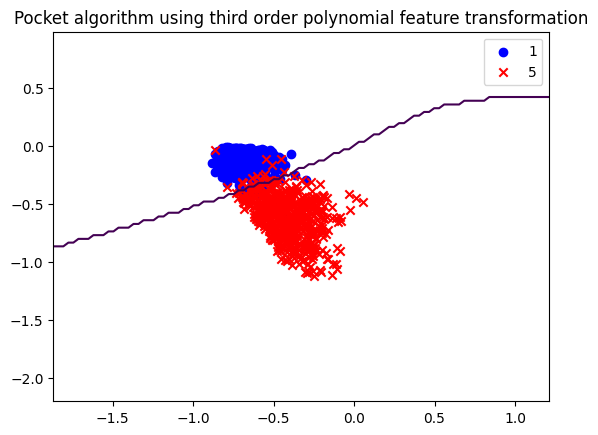

In [85]:
# Transform features
x_train_transformed = transform_features(x_train)
x_test_transformed = transform_features(x_test)

w_PLA_transformed = pla(x_train_transformed, y_train)
w_pocket_transformed = pocket_algorithm(x_train_transformed, y_train, w_PLA_transformed, max_iterations=1000)

# Compute test error
error_rate_pla_transformed = compute_error_rate(w_PLA_transformed, x_test_transformed, y_test)
error_rate_pocket_transformed = compute_error_rate(w_pocket_transformed, x_test_transformed, y_test)

print(f"Error rate for PLA_transformed: {error_rate_pla_transformed:.2f}")
print(f"Error rate for Pocket_transformed: {error_rate_pocket_transformed:.2f}")

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            label='1', color='blue', marker='o')

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            label='5', color='red', marker='x')

x_min, x_max = x_test_transformed[:, 1].min() - 1, x_test_transformed[:, 1].max() + 1
y_min, y_max = x_test_transformed[:, 2].min() - 1, x_test_transformed[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_features = transform_features(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
Z = np.sign(np.dot(grid_features, w_pocket_transformed))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0])

plt.legend()
plt.title('Pocket algorithm using third order polynomial feature transformation')
plt.show()